In [66]:
%matplotlib inline
import pylab
import sqlite3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

pylab.rcParams['figure.figsize'] = (10,6)


In [9]:
conn = sqlite3.connect('/Users/Taha/Desktop/datascience/datasets/DeathRecords/database.sqlite')

query = """
Select name from sqlite_master where type = 'table';
"""
    
df_tables = pd.read_sql(query, conn)

df_tables

,name
0,Icd10Code
1,ActivityCode
2,AgeRecode12
3,AgeRecode27
4,AgeRecode52
5,AgeType
6,BridgedRaceFlag
7,DayOfWeekOfDeath
8,Education1989Revision
9,Education2003Revision


In [62]:
query = """
Select 
    id, 
    MonthOfDeath month, 
    dayOfWeekOfDeath week_day, 
    sex sex, 
    Age age, 
    ms.description marital_status, 
    injuryAtWork,
    mod.description death_manner, 
    md.description dispose_method, 
    Autopsy, 
    r.description race, 
    ic.description cause_death,
    ac.description activity
     
from deathrecords dr

join maritalStatus ms on ms.code = dr.maritalStatus
join mannerOfDeath mod on mod.code = dr.mannerOfDeath
join MethodOfDisposition md on md.code = dr.MethodOfDisposition
join Icd10Code ic on ic.code = dr.Icd10Code
join ActivityCode ac on ac.code = dr.ActivityCode
join race r on r.code = dr.race
where agetype = 1
and age < 150

"""

# query = "select * from maritalstatus"

df = pd.read_sql(query, conn)


In [63]:
df = df.set_index(['Id'])

In [80]:
df.describe()
df.dtypes

month              int64
week_day          object
sex               object
age                int64
marital_status    object
InjuryAtWork      object
death_manner      object
dispose_method    object
Autopsy           object
race              object
cause_death       object
activity          object
dtype: object

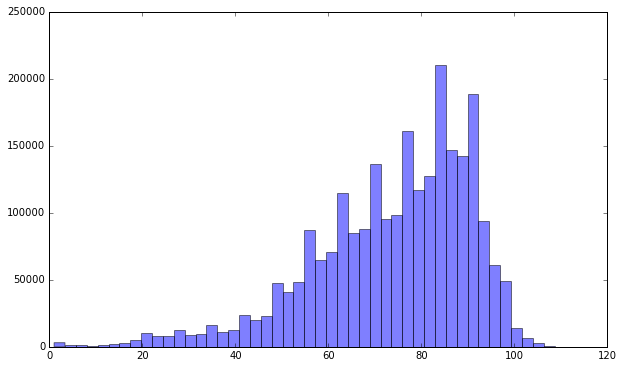

In [120]:
plt.hist(df['age'], bins=50, alpha=0.5)
plt.show()

In [83]:
df['age_group'] = '0-18'

df['age_group'][(df['age'] > 18) & (df['age'] <= 25)] = '18-25'

df['age_group'][(df['age'] > 25) & (df['age'] <= 40)] = '25-40'

df['age_group'][(df['age'] > 40) & (df['age'] <= 60)] = '40-60'

df['age_group'][df['age'] > 60] = '60+'

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying

In [99]:
#df['age_group'].dtypes
df.groupby('age_group').size()


age_group
0-18       15249
18-25      25182
25-40      75590
40-60     391163
60+      1977476
dtype: int64

TypeError: len() of unsized object

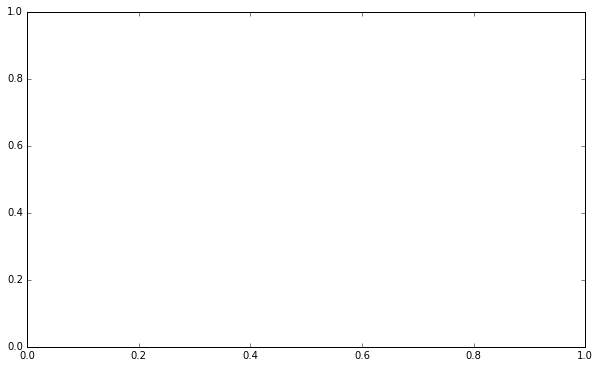

In [117]:
plt.hist(df['age_group'], alpha=0.5)
plt.show()

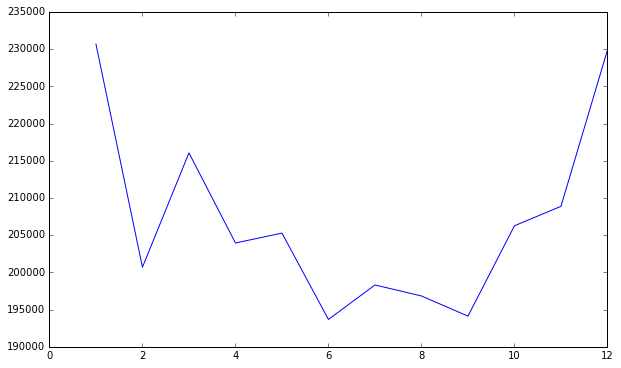

In [151]:
df_month = pd.DataFrame(df.groupby('month').size()).rename(columns={0:'deaths'})
# df_month.index

df_month['month'] = df_month.index


x = df_month['month']
y = df_month['deaths']

plt.plot(x,y)
plt.show()

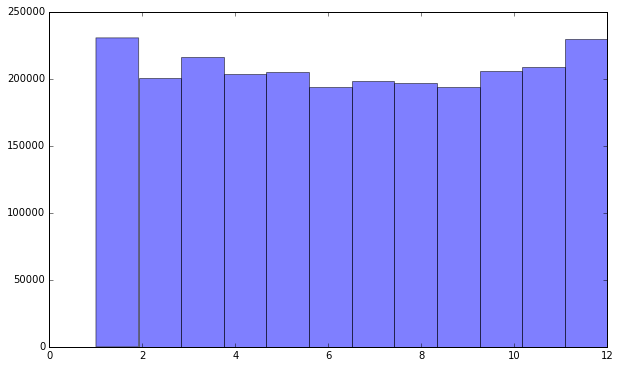

In [157]:
plt.hist(df['month'], alpha=0.5, bins = 12)
plt.show()

TypeError: len() of unsized object

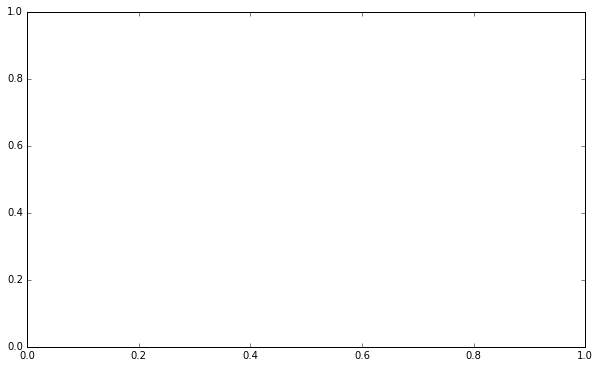

In [160]:
plt.hist(df['week_day'], alpha=0.5)
plt.show()

TypeError: len() of unsized object

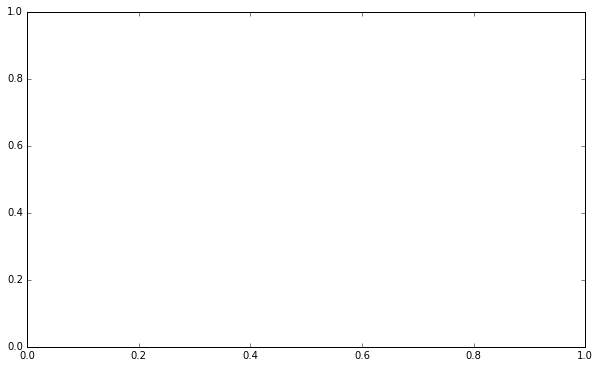

In [164]:
plt.hist(df['dispose_method'], alpha=0.5)
plt.show()